C:\Users\mied1\AppData\Local\Temp\ipykernel_19504\3342213348.py:21: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Clean = pd.read_csv(r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\All_Countries.csv")


------------------------------------------------------------
--------------- Most representative Variables:petrol
------------------------------------------------------------


,Variable,Energy,Importance
0,Fuel consumption,petrol,0.223658
1,Wheelbase_mm,petrol,0.219928
2,Engine_cm3,petrol,0.209152
3,Power_KW,petrol,0.204206
4,Axle_width_steer_mm,petrol,0.202794


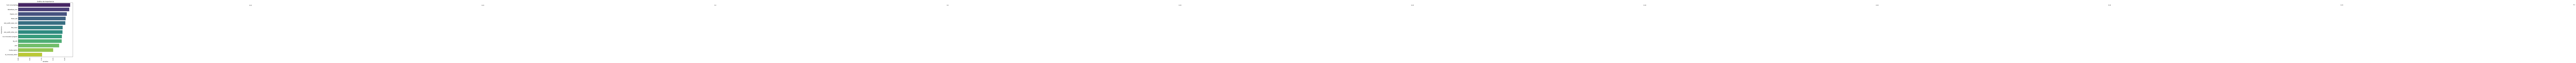

------------------------------------------------------------
--------------- Most representative Variables:diesel
------------------------------------------------------------


,Variable,Energy,Importance
0,Wheelbase_mm,diesel,0.226974
1,Axle_width_other_mm,diesel,0.210749
2,Power_KW,diesel,0.199251
3,Test_mass,diesel,0.198648
4,Axle_width_steer_mm,diesel,0.198049


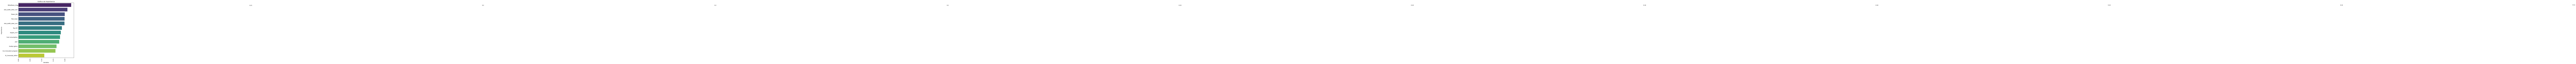

------------------------------------------------------------
--------------- Most representative Variables:lpg
------------------------------------------------------------


,Variable,Energy,Importance
0,Kg_veh,lpg,0.221416
1,Fuel consumption,lpg,0.216617
2,Axle_width_steer_mm,lpg,0.209522
3,Axle_width_other_mm,lpg,0.209313
4,year,lpg,0.209210


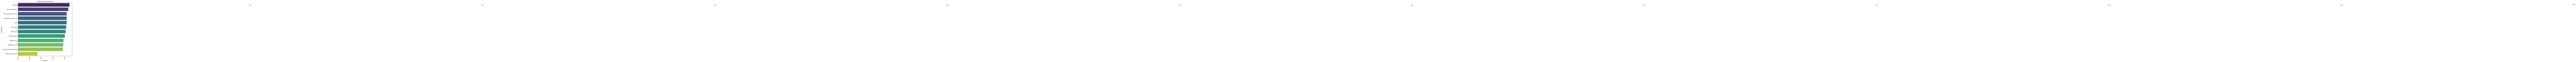

------------------------------------------------------------
--------------- Most representative Variables:hybrid petrol
------------------------------------------------------------


,Variable,Energy,Importance
0,Engine_cm3,hybrid petrol,0.221699
1,Axle_width_other_mm,hybrid petrol,0.202507
2,Axle_width_steer_mm,hybrid petrol,0.201889
3,Fuel consumption,hybrid petrol,0.183034
4,El_Consumpt_whkm,hybrid petrol,0.179430


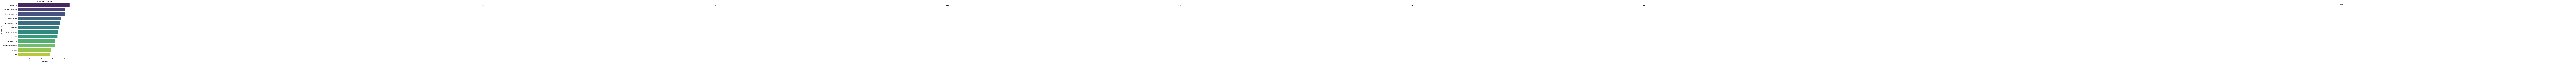

------------------------------------------------------------
--------------- Most representative Variables:hybrid diesel
------------------------------------------------------------


,Variable,Energy,Importance
0,El_Consumpt_whkm,hybrid diesel,0.216014
1,Axle_width_other_mm,hybrid diesel,0.213924
2,Electric range (km),hybrid diesel,0.206369
3,Axle_width_steer_mm,hybrid diesel,0.184988
4,year,hybrid diesel,0.178831


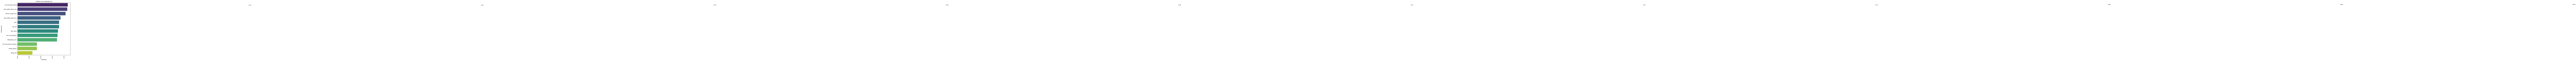

In [1]:
#################################################################################
####   DIMENSION RESUCTION PCA - Identify more important Variables by ENERGY
##################################################################################
#-- Liberate memory
import gc
gc.collect()

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%run "Func_PCA_dimensionReduction.ipynb"

df_Clean = pd.read_csv(r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\All_Countries.csv")
result_df = pd.DataFrame(columns=["Reduction_type", "Energy","Selected_vars"])

df_Clean = df_Clean.dropna()

ToDelete = df_Clean.loc[(df_Clean["Energy"] == "electric") ]
df_Clean = df_Clean.drop(ToDelete.index)
   
ToDelete = df_Clean.loc[(df_Clean["Energy"] == "hydrogen") ]
df_Clean = df_Clean.drop(ToDelete.index)
#------------------------------------------------------------------------------------
df_Clean = df_Clean.drop("Em_on_target",axis=1)
df_Clean = df_Clean.drop("CO2_Qtls", axis=1)
df_Clean = df_Clean.drop("CO2_wltp", axis=1)
#------------------------------------------------------------------------------------

df_numeric = df_Clean.select_dtypes(include=['int', 'float'])

scaler = StandardScaler()
Energies = df_Clean["Energy"].unique()
NumVar = 12

for z, Ene in enumerate(Energies):  
       
    df_Energy = df_Clean.loc[df_Clean["Energy"] == Ene]
    df_numeric = df_Energy.select_dtypes(include=['int', 'float'])
        
    dfCorr = pd.DataFrame(scaler.fit_transform(df_numeric)).corr()
    dfCorr.columns = df_numeric.columns
    dfCorr = dfCorr.replace([np.inf, -np.inf, np.nan], 0.0)

    result_df = Func_PCA_dimensionReduction(dfCorr,result_df,Ene) 

result_df.to_csv('ReductionsByEnergy.csv', index=False)

import winsound
winsound.PlaySound("C:\\Users\\mied1\\00 - Herramientas Python\\mixkit-intro-transition-1146.wav", winsound.SND_FILENAME)   

In [3]:


tabla = result_df.groupby(['Selected_vars', 'Energy', 'Reduction_type']).size().reset_index(name='frecuencia')
tabla_cruzada = pd.crosstab([result_df['Selected_vars']], result_df['Energy'])
tabla_cruzada['suma'] = tabla_cruzada.sum(axis=1)

# Imprimimos la tabla cruzada
display(tabla_cruzada)


Energy,diesel,hybrid diesel,hybrid petrol,lpg,petrol,suma
Selected_vars,,,,,,
Axle_width_other_mm,1,1,1,1,1,5
Axle_width_steer_mm,1,1,1,1,1,5
Eco-innovation program,1,1,1,1,1,5
El_Consumpt_whkm,1,1,1,0,1,4
Electric range (km),0,1,1,1,0,3
Engine_cm3,1,0,1,1,1,4
Erwltp (g/km),1,1,0,1,1,4
Fuel consumption,1,1,1,1,1,5
Kg_veh,1,1,1,1,1,5
